**Outliers** are data points that deviate significantly from the majority of observations.

A classical definition by **Hawkins** states:

> *“An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.”*

Outliers may arise because the underlying **data-generating process behaved unusually**, and therefore they can contain useful information about **abnormal system behavior**.

Outliers are used to detect:

- intrusion or malicious activity in computer systems
- credit-card fraud or unusual spending patterns
- unusual sensor readings (event detection)
- medical abnormalities in MRI, PET, or ECG data
- suspicious financial or insurance behavior
- anomalies in environmental or climate data

In these domains, the data usually follows a **normal model**, and deviations from that model are treated as important signals. Normal observations are sometimes called **inliers**.

Modern machine learning often uses the term **anomaly** to emphasize that the deviation is **meaningful, suspicious, or indicative of a critical event.**

Thus:

- **Outlier = statistical deviation**
- **Anomaly = meaningful or actionable deviation**


# Difference Between Noise and Anomalies

## Noise

- Noise refers to random, meaningless variations in data that do not correspond to any real pattern or event.
- It is usually introduced by imperfections in data collection, such as sensor inaccuracies, measurement errors, electrical interference, transmission issues, or environmental factors.
- Noise is generally ubiquitous in real-world data and does not carry meaningful information.
- The primary goal when dealing with noise is to reduce or eliminate its impact through preprocessing techniques (e.g., smoothing, filtering, moving averages, low-pass filters, or denoising algorithms like wavelet denoising).

### Examples of Noise
- A temperature sensor in a stable room fluctuates between 24.1°C and 24.9°C due to minor electrical interference or sensor precision limits.
- Stock price data shows tiny, erratic second-to-second changes caused by random bid/ask fluctuations in a calm market.
- Background hissing or static in an audio recording from microphone imperfections.

## Anomalies

- An anomaly is a rare, significant deviation from the expected or normal pattern of the data.
- It typically represents a meaningful event, such as a fault, fraud, attack, or critical change in the underlying system.
- Anomalies are often sparse and carry important diagnostic or predictive value.
- The goal is to detect and investigate them, commonly using techniques like statistical thresholds, isolation forests, autoencoders, or one-class SVMs.
- Applications include fraud detection, network intrusion detection, predictive maintenance, medical abnormality detection, and rare event monitoring.

### Examples of Anomalies
- The same temperature sensor in a machine suddenly spikes to 120°C, indicating potential overheating or equipment failure.
- A credit card transaction of 10000 from an account that typically spends <200 per day — possible fraud.
- A server’s CPU usage jumps from a steady 20–30% to 100% for several minutes, suggesting a cyber attack or runaway process.
- In ECG heartbeat data, an irregular beat pattern that deviates significantly from the patient’s normal rhythm — potential arrhythmia.

## Key Conceptual Differences

| Aspect              | Noise                              | Anomaly                               |
|---------------------|------------------------------------|---------------------------------------|
| **Meaning**         | Random, meaningless variation      | Significant, meaningful deviation     |
| **Cause**           | Measurement errors, interference, randomness | Unusual real-world event or condition |
| **Frequency**       | Common and widespread              | Rare and infrequent                   |
| **Importance**      | Generally undesirable; reduces model performance | Often critical; requires attention    |
| **Typical Action**  | Remove, filter, or smooth          | Detect, alert, and investigate        |
| **Impact on Models**| Degrades accuracy and generalization | Represents rare but true events that should be identified |
| **Handling Goal**   | Improve data quality               | Discover insights or prevent issues   |

Understanding this distinction is crucial in data science and machine learning: treating anomalies as noise (and removing them) can lead to missing critical signals, while failing to handle noise can obscure true anomalies.

# Different methods of anomaly detection

1. Statistical & Density-Based Methods


### 1.1  Z-Score Method for Anomaly Detection 

The Z-score method measures how far a data point is from the mean, expressed in units of standard deviation.  

It assumes that the data follows a Gaussian (normal) distribution, where most points lie close to the mean and very few lie far out in the tails.  

A data point is considered an anomaly if it is too many standard deviations away from the mean, meaning it has extremely low probability under a normal curve.


# Mathematics of Z-Score for Point Anomaly Detection

The Z-score (also known as standard score) is a fundamental statistical method for detecting **point anomalies** in univariate data, particularly when the data is assumed to follow a roughly normal (Gaussian) distribution. This approach is widely discussed in introductory statistics and data mining textbooks, such as:

- *Introduction to Data Mining* by Pang-Ning Tan, Michael Steinbach, and Vipin Kumar (2nd Edition, 2019)
- *Statistics for Engineers and Scientists* by William Navidi (freely available chapters in many academic resources)

## Z-Score Formula

For a data value \( x_i \), the Z-score is defined as:

$$ z_i = \frac{x_i - \mu}{\sigma} $$

Where:

- $x_i$: The individual data point
- $( \mu )$ The mean of the dataset
- $( \sigma )$ The standard deviation of the dataset
- $( z_i )$ The number of standard deviations that \( x_i \) is away from the mean

## Interpretation and Anomaly Threshold

A common rule of thumb for identifying outliers (point anomalies) is:

$$ |z_i| > 3 \quad \Rightarrow \quad \text{Outlier (anomaly)} $$

This threshold is based on the **empirical rule** (also called the **68–95–99.7 rule**) for normal distributions:

- Approximately **68%** of data falls within $( \pm 1 \sigma )$
- Approximately **95%** of data falls within $( \pm 2 \sigma )$
- Approximately **99.7%** of data falls within $( \pm 3 \sigma )$

Thus, values outside $( \pm 3)$standard deviations are rare (probability ≈ 0.3%) under a normal distribution and are considered suspicious or anomalous.

## Limitations

- Works best for univariate, normally distributed data.
- Not suitable for contextual or collective anomalies.
- Sensitive to outliers when estimating \( \mu \) and \( \sigma \) (robust alternatives like median and Median Absolute Deviation (MAD) are often preferred in practice).

Dataset summary:
            value       index
count  205.000000  205.000000
mean    50.187600  102.000000
std     12.391632   59.322565
min    -20.000000    0.000000
25%     42.979469   51.000000
50%     50.130019  102.000000
75%     55.425600  153.000000
max    105.000000  204.000000

Detected anomalies (|Z-score| > 3):
     value   z_score
200   90.0  3.220711
201   95.0  3.625196
202  100.0  4.029682
203  -20.0  5.677978
204  105.0  4.434168


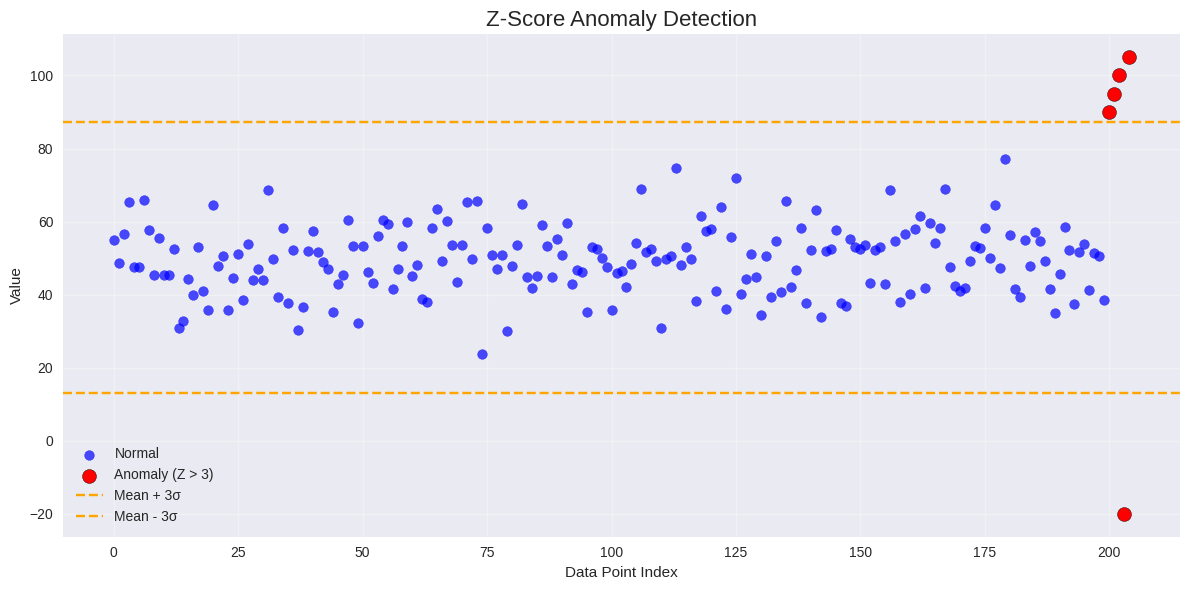


Total data points: 205
Detected anomalies: 5
Anomaly rate: 2.44%


In [1]:
# Demonstration of using Z-Score to detect point anomalies in a dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Step 1: Generate a sample dataset
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=10, size=200)  # Main cluster
outliers = np.array([90, 95, 100, -20, 105])                 # Intentional outliers
data = np.concatenate([normal_data, outliers])

# Create DataFrame
df = pd.DataFrame({'value': data})
df['index'] = df.index

print("Dataset summary:")
print(df.describe())

# Step 2: Calculate Z-scores
df['z_score'] = np.abs(stats.zscore(df['value']))

# Step 3: Define threshold
threshold = 3
df['is_anomaly'] = df['z_score'] > threshold

# Display anomalies
print("\nDetected anomalies (|Z-score| > 3):")
print(df[df['is_anomaly']][['value', 'z_score']])

# Step 4: Visualization
plt.figure(figsize=(12, 6))

# Plot normal points
plt.scatter(df['index'], df['value'], c='blue', label='Normal', alpha=0.7)

# Highlight anomalies 
anomalies = df[df['is_anomaly']]  # <-- This was missing ] and )
plt.scatter(anomalies['index'], anomalies['value'], 
            c='red', label='Anomaly (Z > 3)', s=100, edgecolor='black')

# Add threshold lines
mean_val = df['value'].mean()
std_val = df['value'].std()
plt.axhline(mean_val + threshold * std_val, color='orange', linestyle='--', 
            label=f'Mean + {threshold}σ')
plt.axhline(mean_val - threshold * std_val, color='orange', linestyle='--', 
            label=f'Mean - {threshold}σ')

plt.title('Z-Score Anomaly Detection', fontsize=16)
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Step 5: Summary stats
num_anomalies = df['is_anomaly'].sum()
print(f"\nTotal data points: {len(df)}")
print(f"Detected anomalies: {num_anomalies}")
print(f"Anomaly rate: {num_anomalies / len(df) * 100:.2f}%")

# 1.2 Median Absolute Deviation (MAD) for Point Anomaly Detection

The **Median Absolute Deviation (MAD)** is a robust statistical method for detecting **point anomalies**, particularly when the data does **not** follow a normal (Gaussian) distribution or contains outliers that could distort the mean and standard deviation.

Unlike the classic Z-score, which uses mean and standard deviation (and is sensitive to outliers), MAD uses the **median** and **absolute deviations from the median**, making it much more resilient in skewed, heavy-tailed, or contaminated datasets.

This approach is widely discussed in robust statistics and outlier detection literature, such as:

- *Introduction to Robust Estimation and Hypothesis Testing* by Rand R. Wilcox  
- *Outlier Analysis* by Charu C. Aggarwal (Chapter on Robust Methods)

---

## Mathematics of MAD

### Step 1: Median Absolute Deviation (MAD)

The MAD is defined as:

$$
\text{MAD} = \mathrm{median} \Big( \big| x_i - \mathrm{median}(x) \big| \Big)
$$

Where:  
- `x = {x_1, x_2, ..., x_n}` is the dataset  
- `median(x)` is the median of the dataset (50th percentile)  
- `|x_i - median(x)|` is the absolute deviation of each point from the median  
- `median(...)` computes the median of these absolute deviations  

MAD measures the typical deviation from the median in a robust manner.

---

### Step 2: Modified Z-Score (using MAD)

The robust version of the Z-score (called the **Modified Z-score**) is:

$$
z_{\mathrm{MAD}_i} = \frac{0.6745 \, (x_i - \mathrm{median}(x))}{\mathrm{MAD}}
$$

Where:  
- `0.6745` is a scaling constant chosen so that MAD is a consistent estimator of the standard deviation for **normally distributed data**.  
  Specifically, `0.6745 ≈ 1 / Φ⁻¹(0.75)`, where `Φ⁻¹(0.75)` is the 75th percentile of the standard normal distribution.  
- Absolute value is usually taken for anomaly detection:  

$$
|z_{\mathrm{MAD}_i}| > \text{threshold} \quad \Rightarrow \quad \text{anomaly}
$$

---

### Anomaly Threshold

A common rule of thumb:

$$
|z_{\mathrm{MAD}_i}| > 3.5 \quad \Rightarrow \quad \text{Outlier (anomaly)}
$$

- **3.5** is slightly higher than the usual 3 because MAD is more conservative.  
- Some sources may use **2.5** or **3**, depending on the desired sensitivity.

This threshold identifies points that deviate significantly from the median in a robust way.

---

## Why Use MAD Instead of Z-Score?

- **Robust to outliers:** Median is unaffected by extreme values, unlike the mean.  
- **Better for skewed/non-normal data:** Works well with exponential, log-normal, or heavy-tailed distributions.  
- **High breakdown point (50%):** Can handle up to nearly 50% outliers without being distorted (vs. ~0% for mean/std).

---

## Limitations

- Less efficient than Z-score when data is truly normal (requires more data for the same precision).  
- The constant `0.6745` assumes normal distribution; may need adjustment for other distributions.  
- Not ideal for very small datasets (median/MAD can be unstable with few points).


Dataset Summary (Skewed + Outliers):
count    205.000000
mean       2.210754
std        2.977471
min        0.010000
25%        0.519610
50%        1.375319
75%        2.947780
max       22.000000
Name: value, dtype: float64

Detected anomalies using Z-Score (|Z| > 3):
     value   z_score  abs_z_score
201   15.0  4.305853     4.305853
202   18.0  5.315886     5.315886
203   20.0  5.989241     5.989241
204   22.0  6.662596     6.662596

Detected anomalies using Modified Z-Score (|MAD-Z| > 3.5):
         value  modified_z  abs_modified_z
194   6.564020    3.527611        3.527611
195   6.741261    3.648111        3.648111
196   6.985614    3.814238        3.814238
197   7.007115    3.828856        3.828856
198   7.135596    3.916206        3.916206
199   8.488074    4.835707        4.835707
200   8.668293    4.958231        4.958231
201  15.000000    9.262931        9.262931
202  18.000000   11.302523       11.302523
203  20.000000   12.662251       12.662251
204  22.000000   14.021979 

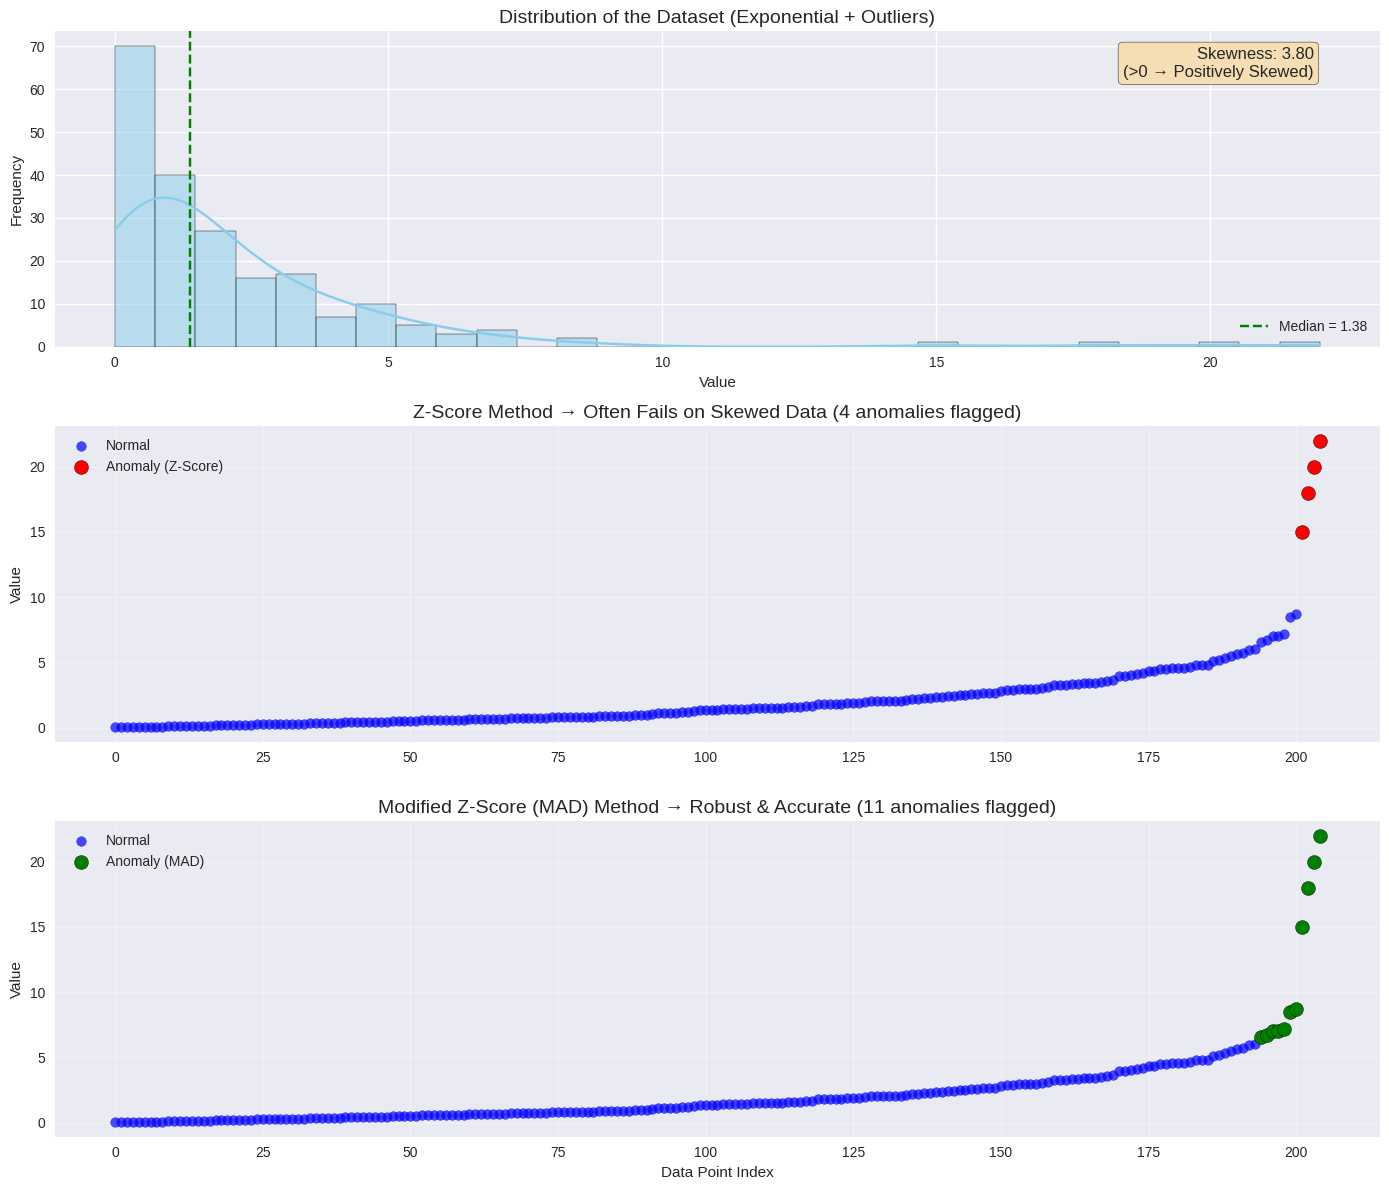


=== Final Summary ===
Total data points: 205
Skewness: 3.798 → This is POSITIVELY SKEWED (right-tailed)
   → Tail is on the right → most values are small, few large ones pull the tail
Z-Score flagged: 4 points
MAD flagged: 11 points (correctly identifies true outliers)

Conclusion: On positively skewed data, MAD is far superior to classic Z-score!


In [2]:
# Enhanced Demonstration: Z-Score vs Modified Z-Score (MAD) on Skewed Data
# Now includes histogram to visualize skewness + full comparison

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Step 1: Generate skewed data (exponential distribution) + outliers
np.random.seed(42)

# Main data: exponential distribution → positively skewed
skewed_data = np.random.exponential(scale=2, size=200)

# Add true outliers (very large values + one unusually small)
outliers = np.array([15, 18, 20, 22, 0.01])  # Extreme high + one low
data = np.concatenate([skewed_data, outliers])

# Create DataFrame
df = pd.DataFrame({'value': data})
df = df.sort_values('value').reset_index(drop=True)
df['index'] = df.index

print("Dataset Summary (Skewed + Outliers):")
print(df['value'].describe())

# Step 2: Apply classic Z-Score
df['z_score'] = stats.zscore(df['value'])
df['abs_z_score'] = np.abs(df['z_score'])
z_threshold = 3
df['anomaly_z'] = df['abs_z_score'] > z_threshold

# Step 3: Apply Modified Z-Score using MAD
median_val = np.median(df['value'])
mad = np.median(np.abs(df['value'] - median_val))

# Prevent division by zero
mad = mad if mad != 0 else 1e-6

df['modified_z'] = 0.6745 * (df['value'] - median_val) / mad
df['abs_modified_z'] = np.abs(df['modified_z'])
mad_threshold = 3.5
df['anomaly_mad'] = df['abs_modified_z'] > mad_threshold

# Display results
print("\nDetected anomalies using Z-Score (|Z| > 3):")
print(df[df['anomaly_z']][['value', 'z_score', 'abs_z_score']])

print("\nDetected anomalies using Modified Z-Score (|MAD-Z| > 3.5):")
print(df[df['anomaly_mad']][['value', 'modified_z', 'abs_modified_z']])

# Step 4: Visualization - 3 subplots
fig = plt.figure(figsize=(14, 12))

# Top: Histogram + KDE to show skewness
ax1 = plt.subplot(3, 1, 1)
sns.histplot(df['value'], kde=True, bins=30, color='skyblue', ax=ax1)
ax1.set_title('Distribution of the Dataset (Exponential + Outliers)', fontsize=14)
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.axvline(median_val, color='green', linestyle='--', label=f'Median = {median_val:.2f}')
ax1.legend()

# Add skewness value
skewness = stats.skew(df['value'])
ax1.text(0.95, 0.95, f'Skewness: {skewness:.2f}\n(>0 → Positively Skewed)', 
         transform=ax1.transAxes, fontsize=12, verticalalignment='top', 
         horizontalalignment='right', bbox=dict(boxstyle="round", facecolor="wheat"))

# Middle: Z-Score method
ax2 = plt.subplot(3, 1, 2)
ax2.scatter(df['index'], df['value'], c='blue', label='Normal', alpha=0.7)
anomalies_z = df[df['anomaly_z']]
ax2.scatter(anomalies_z['index'], anomalies_z['value'], 
            c='red', label='Anomaly (Z-Score)', s=100, edgecolor='black')
ax2.set_title('Z-Score Method → Often Fails on Skewed Data '
              f'({anomalies_z.shape[0]} anomalies flagged)', fontsize=14)
ax2.set_ylabel('Value')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Bottom: MAD method
ax3 = plt.subplot(3, 1, 3)
ax3.scatter(df['index'], df['value'], c='blue', label='Normal', alpha=0.7)
anomalies_mad = df[df['anomaly_mad']]
ax3.scatter(anomalies_mad['index'], anomalies_mad['value'], 
            c='green', label='Anomaly (MAD)', s=100, edgecolor='black')
ax3.set_title('Modified Z-Score (MAD) Method → Robust & Accurate '
              f'({anomalies_mad.shape[0]} anomalies flagged)', fontsize=14)
ax3.set_xlabel('Data Point Index')
ax3.set_ylabel('Value')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final Summary
print(f"\n=== Final Summary ===")
print(f"Total data points: {len(df)}")
print(f"Skewness: {skewness:.3f} → This is POSITIVELY SKEWED (right-tailed)")
print(f"   → Tail is on the right → most values are small, few large ones pull the tail")
print(f"Z-Score flagged: {df['anomaly_z'].sum()} points")
print(f"MAD flagged: {df['anomaly_mad'].sum()} points (correctly identifies true outliers)")
print("\nConclusion: On positively skewed data, MAD is far superior to classic Z-score!")

# Distance-Based Anomaly Detection: k-Nearest Neighbors (k-NN) Approach

Distance-based anomaly detection methods identify anomalies (outliers) by measuring how far a data point is from its neighbors. A point that is consistently far from most other points is considered anomalous.

The **k-Nearest Neighbors (k-NN)** approach is one of the most popular distance-based techniques. It assumes that **normal data points occur in dense neighborhoods**, while **anomalies are located far from their nearest neighbors**.

This method is non-parametric (makes no assumptions about data distribution) and works well in multi-dimensional spaces. It is widely discussed in data mining and anomaly detection textbooks, such as:
- *Outlier Analysis* by Charu C. Aggarwal (Springer, 2017)
- *Introduction to Data Mining* by Pang-Ning Tan, Michael Steinbach, and Vipin Kumar

## Theory

### Core Idea
- Normal points have many close neighbors → low average distance to nearest neighbors.
- Anomalous points are isolated → high average distance to nearest neighbors.
- By computing distances to the k-nearest neighbors, we can rank points by "outlyingness".

### Common Variants
1. **k-NN Distance Score**  
   The anomaly score is the distance to the **k-th nearest neighbor**.  
   Points with large k-th nearest neighbor distance are anomalies.

2. **Average k-NN Distance** (most common)  
   The anomaly score is the **average distance** to the k nearest neighbors.  
   Used in many implementations (including scikit-learn).

3. **Local Outlier Factor (LOF)**  
   An advanced extension of k-NN that compares local density of a point to its neighbors (we'll cover LOF separately if needed).

## Mathematics

### 1. Distance to k-th Nearest Neighbor
Let \( d_k(p) \) be the distance from point \( p \) to its **k-th nearest neighbor**.

Anomaly score:
$$ \text{Score}(p) = d_k(p) $$

Points with large \( d_k(p) \) are considered outliers.

### 2. Average Distance to k Nearest Neighbors (most widely used)
Let \( N_k(p) \) be the set of k nearest neighbors of point \( p \).

Anomaly score:
$$ \text{Score}(p) = \frac{1}{k} \sum_{q \in N_k(p)} \text{dist}(p, q) $$

Where \( \text{dist}(p, q) \) is typically **Euclidean distance**:
$$ \text{dist}(p, q) = \sqrt{\sum_{i=1}^{d} (p_i - q_i)^2} $$
(for d-dimensional data)

### Anomaly Detection Rule
- Compute the score for all points.
- Flag points with **high scores** as anomalies.
- Common approaches:
  - Use a **fixed threshold** (e.g., top n% highest scores).
  - Use **z-score** or percentile on the scores.
  - In practice: points in the top 5–10% of scores are often flagged.

## Advantages
- Simple and intuitive.
- Works in high-dimensional spaces (with proper distance metrics).
- No assumption of data distribution (non-parametric).
- Effective for global outliers.

## Limitations
- Computationally expensive: O(n²) time for exact k-NN (n = number of points).  
  → Use approximations (KD-tree, Ball-tree, or libraries like FAISS for large data).
- Sensitive to choice of **k** (small k → sensitive to noise; large k → misses local outliers).
- Performs poorly in datasets with varying density (use LOF instead).
- Curse of dimensionality: distances become less meaningful in very high dimensions.

## When to Use k-NN Distance-Based Method
- Data has no clear distribution (non-Gaussian).
- Global outliers are the main concern.
- Dataset is small to medium-sized.
- You want a simple, interpretable baseline.

The k-NN distance method is a foundational technique in distance-based anomaly detection and serves as the basis for more advanced methods like LOF.


Dataset Summary:
Total points: 255
Detected outliers: 13

Outlier points (high k-NN distance):
             x          y  knn_distance_score
37    2.380255   5.821903            1.167407
104   5.515048   8.852731            1.754362
131   1.758733   3.975612            1.710309
161  11.018135  12.510865            1.146973
210  14.472898  12.106409            1.392854
214  13.270109   7.889513            1.164708
235  11.669938   7.237695            1.308047
239  15.694657  11.343490            1.791157
250   0.000000   0.000000            5.183350
251  18.000000  18.000000            7.599156
252   3.000000  15.000000            7.346224
253  20.000000   5.000000            7.059231
254   8.000000  20.000000            8.110196


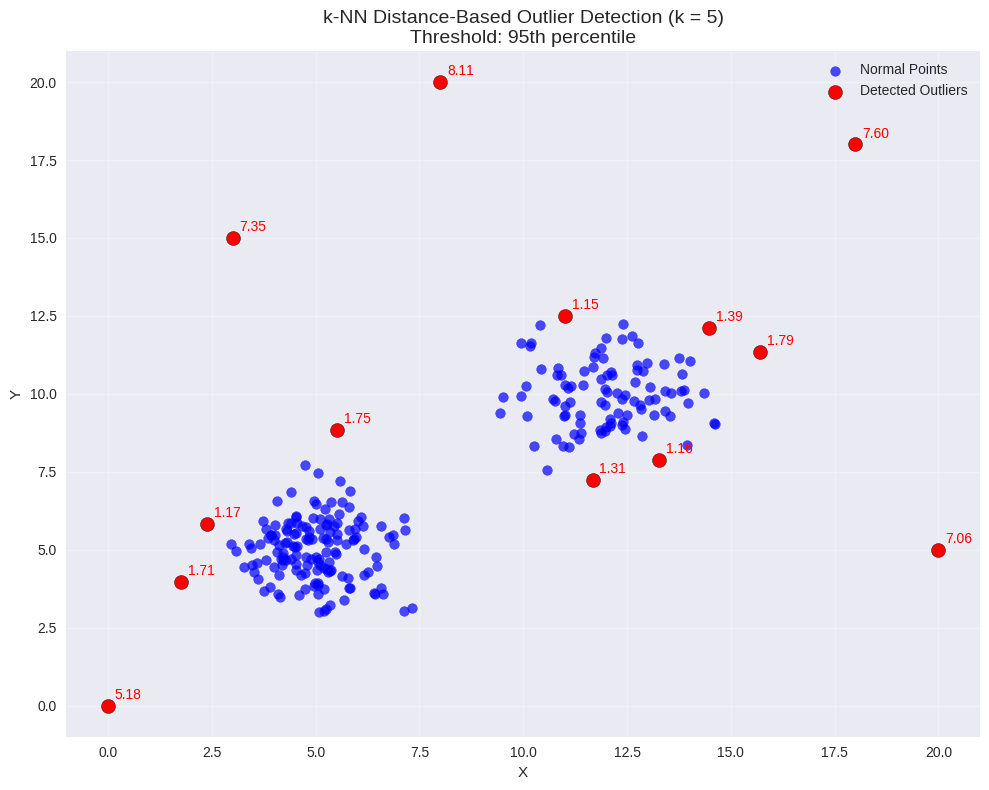


Interpretation:
- Points with high average distance to their 5 nearest neighbors are flagged as outliers.
- The method successfully identifies isolated points far from dense clusters.
- No distributional assumptions are made — suitable for arbitrary cluster shapes.


In [3]:
# Distance-Based Anomaly Detection: k-Nearest Neighbors (k-NN) Outlier Detection
# Demonstrates k-NN method on a dataset with clusters and intentional outliers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic dataset with two clusters and outliers
# Cluster 1: centered at (5, 5)
cluster1 = np.random.normal(loc=[5, 5], scale=1.0, size=(150, 2))

# Cluster 2: centered at (12, 10)
cluster2 = np.random.normal(loc=[12, 10], scale=1.2, size=(100, 2))

# Outliers: isolated points far from clusters
outliers = np.array([[0, 0], [18, 18], [3, 15], [20, 5], [8, 20]])

# Combine data
normal_data = np.vstack([cluster1, cluster2])
data = np.vstack([normal_data, outliers])

# Create DataFrame
df = pd.DataFrame(data, columns=['x', 'y'])

# Step 2: Apply k-NN distance-based outlier detection
k = 5  # Number of neighbors (common choice; can be tuned)

# Fit NearestNeighbors model
nbrs = NearestNeighbors(n_neighbors=k + 1)  # +1 to exclude the point itself
nbrs.fit(df)

# Compute distances and indices of k+1 nearest neighbors
distances, indices = nbrs.kneighbors(df)

# Anomaly score: average distance to k nearest neighbors (excluding self)
# Sort distances and take the last k (excluding the first which is 0)
avg_knn_distances = np.mean(np.sort(distances, axis=1)[:, 1:], axis=1)

df['knn_distance_score'] = avg_knn_distances

# Step 3: Determine outliers using a threshold
# Common approach: top 5% highest scores or fixed percentile
threshold_percentile = 95  # Consider top 5% as outliers
threshold = np.percentile(df['knn_distance_score'], threshold_percentile)

df['is_outlier'] = df['knn_distance_score'] > threshold

# Display results
print("Dataset Summary:")
print(f"Total points: {len(df)}")
print(f"Detected outliers: {df['is_outlier'].sum()}")

print("\nOutlier points (high k-NN distance):")
print(df[df['is_outlier']][['x', 'y', 'knn_distance_score']])

# Step 4: Visualization
plt.figure(figsize=(10, 8))

# Plot normal points
normal = df[~df['is_outlier']]
plt.scatter(normal['x'], normal['y'], c='blue', label='Normal Points', alpha=0.7)

# Plot outliers
outliers_df = df[df['is_outlier']]
plt.scatter(outliers_df['x'], outliers_df['y'], c='red', s=100, 
            edgecolor='black', label='Detected Outliers')

# Annotate outliers with their scores
for idx, row in outliers_df.iterrows():
    plt.annotate(f"{row['knn_distance_score']:.2f}", 
                 (row['x'], row['y']), xytext=(5, 5), 
                 textcoords='offset points', fontsize=10, color='red')

plt.title(f'k-NN Distance-Based Outlier Detection (k = {k})\n'
          f'Threshold: {threshold_percentile}th percentile', fontsize=14)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Step 5: Summary
print("\nInterpretation:")
print(f"- Points with high average distance to their {k} nearest neighbors are flagged as outliers.")
print(f"- The method successfully identifies isolated points far from dense clusters.")
print(f"- No distributional assumptions are made — suitable for arbitrary cluster shapes.")

# Local Outlier Factor (LOF) for Anomaly Detection

The **Local Outlier Factor (LOF)** is a prominent density-based anomaly detection algorithm that identifies outliers by comparing the **local density** of a data point to the local densities of its neighbors. Points with substantially lower density than their neighbors are considered anomalies (local outliers).

LOF was introduced by Markus M. Breunig, Hans-Peter Kriegel, Raymond T. Ng, and Jörg Sander in their seminal paper *"LOF: Identifying Density-Based Local Outliers"* (ACM SIGMOD 2000). It extends simple distance-based methods (like k-NN) by accounting for varying densities across the dataset, making it particularly effective for datasets with regions of different densities.

This method is widely covered in advanced data mining and anomaly detection texts, such as:
- https://dl.acm.org/doi/epdf/10.1145/342009.335388
- *Outlier Analysis* by Charu C. Aggarwal (Springer, 2017)
- *Introduction to Data Mining* by Pang-Ning Tan, Michael Steinbach, and Vipin Kumar (2nd Edition)

## Theory

### Core Idea
- Normal points lie in dense regions → their local density is similar to that of their neighbors.
- Outliers lie in sparse regions → their local density is significantly lower than that of their neighbors.
- LOF quantifies how "outlying" a point is relative to its local neighborhood.

LOF is **local** because the outlier score depends only on the relative density in the vicinity of the point, not on global statistics.


## When to Use LOF
- Datasets with clusters of varying densities.
- Need to detect **local** rather than just global outliers.
- Medium-sized datasets (use approximations like scikit-learn's implementation for larger data).

LOF remains one of the most cited and effective algorithms for density-based local outlier detection and is implemented in major libraries (e.g., scikit-learn's `LocalOutlierFactor`).

Dataset Summary:
Total points: 304
Detected outliers: 16

Detected outliers (LOF label = -1):
          x       y  lof_score_normalized
37    3.690   5.411                 2.100
89    4.868   6.360                 1.698
104   5.258   6.926                 2.632
110   6.157   4.066                 1.801
131   3.379   4.488                 2.404
142   6.067   4.024                 1.746
196   4.340   5.916                 1.829
215   7.633   5.922                 3.843
239  16.158  12.239                 1.958
272   5.057   8.406                 3.418
283   5.924   7.984                 3.570
287  11.659   5.578                 1.729
300   0.000   0.000                14.338
301  15.000  15.000                 1.945
302   2.000  12.000                 2.755
303  13.785   5.389                 2.195


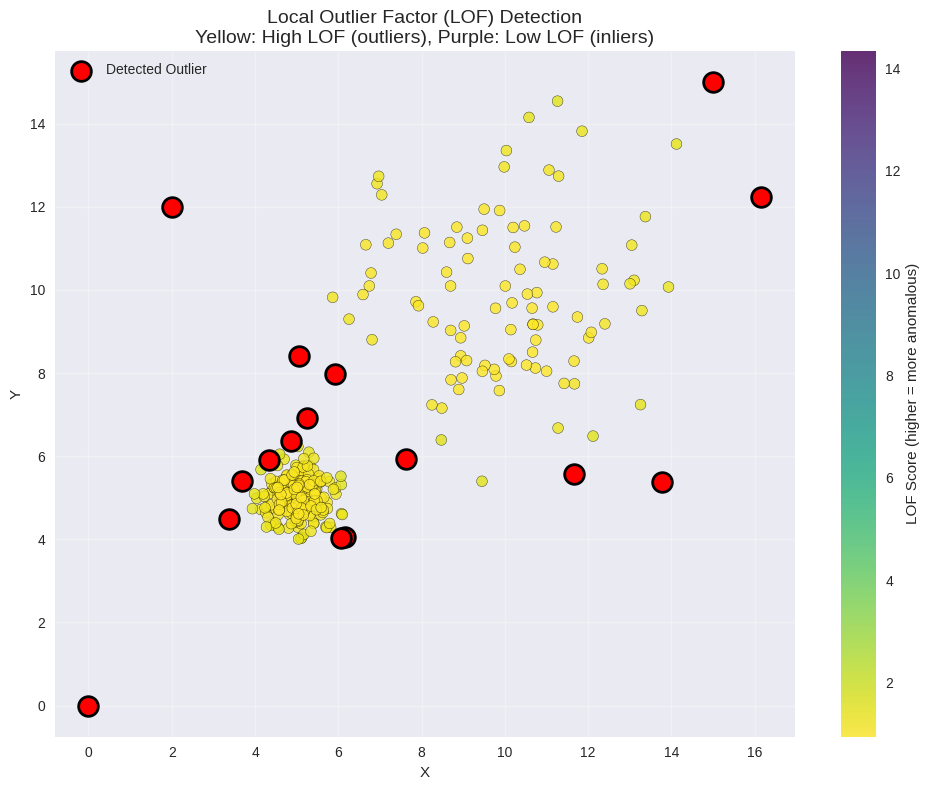


Key Observations:
- Points in the dense cluster (around [5,5]) have low LOF scores → inliers.
- Points in the sparse cluster (around [10,10]) have moderate LOF → still inliers.
- Isolated points (global and local outliers) have high LOF scores → correctly detected.
- LOF successfully identifies local outliers even when global density varies.
- Contamination parameter set to 0.05 (expected 15 outliers).


In [4]:
# Local Outlier Factor (LOF) Demonstration
# Illustrates LOF for detecting local outliers in datasets with varying density clusters

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic dataset with clusters of different densities
# Dense cluster (normal points)
dense_cluster = np.random.normal(loc=[5, 5], scale=0.5, size=(200, 2))

# Sparse cluster (lower density)
sparse_cluster = np.random.normal(loc=[10, 10], scale=2.0, size=(100, 2))

# Global outliers (far from both clusters)
global_outliers = np.array([[0, 0], [15, 15], [2, 12]])

# Local outlier (inside sparse cluster but relatively isolated)
local_outlier = np.array([[10, 10]]) + np.random.normal(scale=5, size=(1, 2))

# Combine all points
normal_data = np.vstack([dense_cluster, sparse_cluster])
outliers = np.vstack([global_outliers, local_outlier])
data = np.vstack([normal_data, outliers])

# Create DataFrame
df = pd.DataFrame(data, columns=['x', 'y'])

# Step 2: Apply Local Outlier Factor
# n_neighbors: typically between 10 and 50; here 20 is suitable for this dataset
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, novelty=False)

# Fit and predict: -1 for outliers, 1 for inliers
df['lof_label'] = lof.fit_predict(df)

# LOF scores (higher = more outlying)
df['lof_score'] = lof.negative_outlier_factor_  # Negative LOF; higher magnitude = stronger outlier
df['lof_score_normalized'] = -lof.negative_outlier_factor_  # Positive for easier interpretation

# Step 3: Results
print("Dataset Summary:")
print(f"Total points: {len(df)}")
print(f"Detected outliers: {len(df[df['lof_label'] == -1])}")

print("\nDetected outliers (LOF label = -1):")
print(df[df['lof_label'] == -1][['x', 'y', 'lof_score_normalized']].round(3))

# Step 4: Visualization
plt.figure(figsize=(10, 8))

# Color by LOF score with colormap
scatter = plt.scatter(df['x'], df['y'], 
                      c=df['lof_score_normalized'], 
                      cmap='viridis_r', 
                      s=60, 
                      edgecolor='k', 
                      alpha=0.8)

# Highlight detected outliers
outliers_df = df[df['lof_label'] == -1]
plt.scatter(outliers_df['x'], outliers_df['y'], 
            c='red', s=200, edgecolor='black', linewidth=2, label='Detected Outlier')

plt.colorbar(scatter, label='LOF Score (higher = more anomalous)')
plt.title('Local Outlier Factor (LOF) Detection\n'
          'Yellow: High LOF (outliers), Purple: Low LOF (inliers)', 
          fontsize=14)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Step 5: Interpretation
print("\nKey Observations:")
print("- Points in the dense cluster (around [5,5]) have low LOF scores → inliers.")
print("- Points in the sparse cluster (around [10,10]) have moderate LOF → still inliers.")
print("- Isolated points (global and local outliers) have high LOF scores → correctly detected.")
print("- LOF successfully identifies local outliers even when global density varies.")
print(f"- Contamination parameter set to 0.05 (expected {int(0.05 * len(df))} outliers).")

# Isolation Forest for Anomaly Detection

The **Isolation Forest** (iForest) is an ensemble-based anomaly detection algorithm specifically designed for identifying anomalies (outliers) in high-dimensional datasets. It operates on the principle that anomalies are "few and different," making them easier to isolate than normal points.

Isolation Forest was introduced by Fei Tony Liu, Kai Ming Ting, and Zhi-Hua Zhou in their paper *"Isolation Forest"* (IEEE International Conference on Data Mining, 2008) and its extended version *"Isolation-based Anomaly Detection"* (ACM TKDD, 2012). It is one of the most efficient and scalable methods for anomaly detection, particularly in large-scale and high-dimensional data.

This algorithm is widely discussed in modern machine learning and anomaly detection resources, including:
- *Outlier Analysis* by Charu C. Aggarwal (Springer, 2017)
- Scikit-learn documentation and related publications

## Theory

### Core Principle: Isolation
- **Normal points** tend to be clustered and require many partitioning steps to be isolated.
- **Anomalies** are sparse and distant from dense regions, so they can be isolated with fewer partitioning steps.
- The algorithm "isolates" observations by randomly selecting a feature and then randomly selecting a split value between the minimum and maximum values of that feature.
- This random partitioning produces shorter paths in trees for anomalies because they lie in sparse regions.

### Isolation Tree (iTree)
An Isolation Tree is a binary tree built recursively:
1. Randomly select a feature.
2. Randomly select a split value within the range of the selected feature.
3. Partition the data into two subsets (left: values < split, right: values ≥ split).
4. Recurse on each subset until a node has only one point or all points are identical.

- The **path length** from root to a leaf for a point measures how easily it is isolated.
- Anomalies have significantly **shorter average path lengths**.

### Isolation Forest
An ensemble of Isolation Trees (typically 100–500 trees):
- Each tree is built on a random subsample of the data (to increase diversity and reduce correlation).
- The final anomaly score for a point is based on the average path length across all trees.

## Mathematics

### Path Length in a Single Tree
For a point \(x\) in an Isolation Tree of height limit \(h\):
- \(h(x)\): path length (number of edges from root to the isolating node).
- Expected path length in a tree is normalized using a correction factor.

### Anomaly Score
The anomaly score \(s\) for a point \(x\) with \(n\) samples is:

$$
s(x, n) = 2^{-\frac{E(h(x))}{c(n)}}
$$

Where:
- \(E(h(x))\): average path length of \(x\) over all trees.
- \(c(n)\): average path length of an unsuccessful search in a Binary Search Tree (BST) built on \(n\) points, used for normalization:

$$
c(n) = 2H(n-1) - \frac{2(n-1)}{n}
$$

\(H(i)\) is the harmonic number, approximated as:

$$
H(i) \approx \ln(i) + \gamma
$$

with $$ 
\gamma \approx 0.5772156649.
$$

### Score Interpretation
- $$(s \approx 1)$$: point has much shorter path than average → strong anomaly.
- $$(s \approx 0.5) $$: point indistinguishable from normal → no clear anomaly.
- $$ (s < 0.5) $$: point has longer paths → likely normal (in dense region).
- Typically, points with $$(s > 0.5)$$ or in the top percentile are flagged as anomalies.

## Advantages
- Highly scalable: linear time complexity $$(O(t \cdot n))$$
(t = number of trees).
- Effective in high-dimensional data (random feature selection mitigates curse of dimensionality).
- No assumption of data distribution.
- Robust to irrelevant features and masking/swamping effects.
- Handles global anomalies well.


## Limitations
- Primarily designed for **global** anomalies; may not detect local anomalies as effectively as LOF.
- Performance depends on the number of trees and subsample size (default 256 in scikit-learn).
- Can produce biased results in extremely sparse or structured data.
- Less interpretable than distance- or density-based methods.

## When to Use Isolation Forest
- Large-scale datasets.
- High-dimensional data (e.g., hundreds of features).
- Need fast, scalable anomaly detection.
- Global outliers are the primary concern.
- Baseline method in production systems (widely used in fraud detection, network intrusion, etc.).

Isolation Forest is implemented efficiently in scikit-learn (`IsolationForest`) and is one of the most popular unsupervised anomaly detection algorithms in practice due to its speed, scalability, and effectiveness.

/home/subodh/ml/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Dataset Summary:
Total points: 355
Detected outliers: 18

Detected outliers:
          x       y  anomaly_score_positive
37    1.904   4.658                   0.005
89    3.788   6.176                   0.000
104   4.412   7.082                   0.048
110   5.852   2.506                   0.019
131   1.407   3.180                   0.068
142   5.706   2.438                   0.002
210  12.061  11.755                   0.022
239  13.079  11.120                   0.067
287  10.829   7.789                   0.005
291  10.633  12.271                   0.009
327  12.573  10.059                   0.005
334   7.349  11.092                   0.012
335  11.246   7.927                   0.015
350   0.000   0.000                   0.225
351  15.000  15.000                   0.222
352   2.000  12.000                   0.168
353  12.000   2.000                   0.143
354   7.000  14.000                   0.145


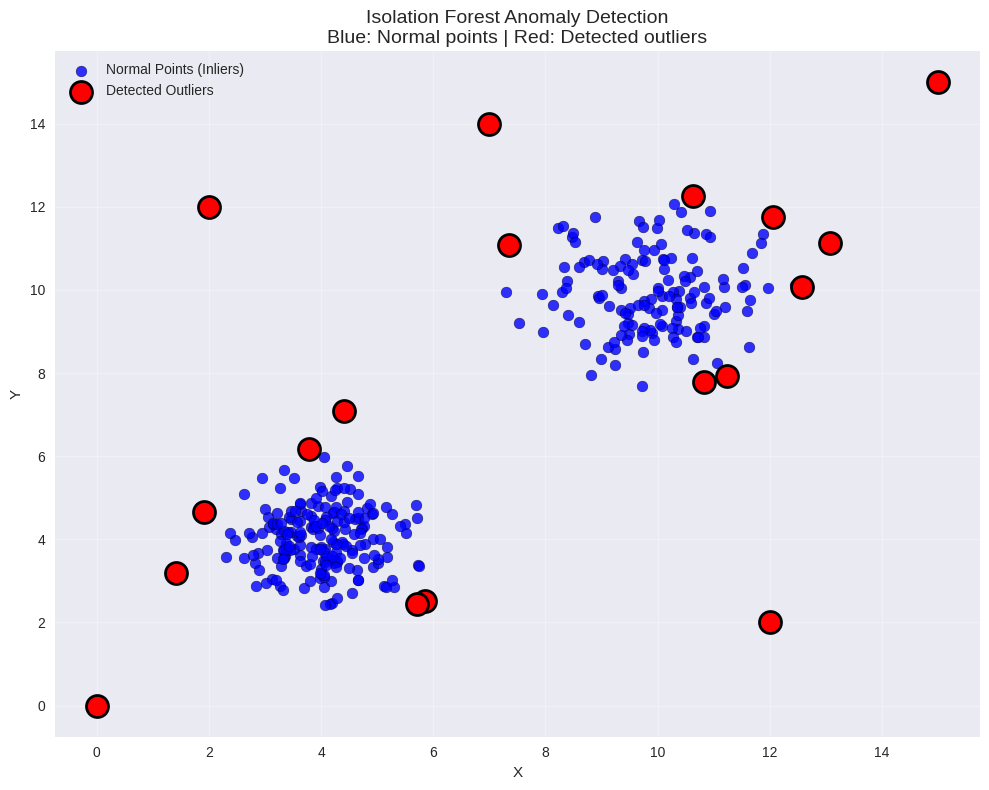

In [5]:
# Isolation Forest for Anomaly Detection (Fixed Visualization Issue)
# Ensures normal points are clearly visible in blue

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Generate synthetic dataset
cluster1 = np.random.normal(loc=[4, 4], scale=0.8, size=(200, 2))
cluster2 = np.random.normal(loc=[10, 10], scale=1.0, size=(150, 2))
normal_data = np.vstack([cluster1, cluster2])

outliers = np.array([
    [0, 0], [15, 15], [2, 12], [12, 2], [7, 14]
])

data = np.vstack([normal_data, outliers])
df = pd.DataFrame(data, columns=['x', 'y'])

# Step 2: Apply Isolation Forest
X = df[['x', 'y']]  # Use only feature columns

iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

df['prediction'] = iso_forest.fit_predict(X)
df['anomaly_score'] = iso_forest.decision_function(X)
df['anomaly_score_positive'] = -df['anomaly_score']

# Step 3: Results
print("Dataset Summary:")
print(f"Total points: {len(df)}")
print(f"Detected outliers: {len(df[df['prediction'] == -1])}")

print("\nDetected outliers:")
print(df[df['prediction'] == -1][['x', 'y', 'anomaly_score_positive']].round(3))

# Step 4: Visualization - Fixed layering and colors
plt.figure(figsize=(10, 8))

# First: Plot normal points (inliers) in blue - plotted first so they appear behind
inliers = df[df['prediction'] == 1]
plt.scatter(inliers['x'], inliers['y'],
            c='blue', s=60, edgecolor='k', alpha=0.8, label='Normal Points (Inliers)')

# Second: Plot detected outliers in red - larger and on top
outliers_df = df[df['prediction'] == -1]
plt.scatter(outliers_df['x'], outliers_df['y'],
            c='red', s=250, edgecolor='black', linewidth=2, label='Detected Outliers')

# Optional: Color by score (uncomment if you want gradient)
# scatter = plt.scatter(df['x'], df['y'],
#                       c=df['anomaly_score_positive'],
#                       cmap='coolwarm_r', s=60, edgecolor='k', alpha=0.8)
# plt.colorbar(scatter, label='Anomaly Score (higher = more anomalous)')

plt.title('Isolation Forest Anomaly Detection\n'
          'Blue: Normal points | Red: Detected outliers',
          fontsize=14)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



# One-Class Classification (OCC)

One-Class Classification (OCC) is a machine learning approach used mainly for anomaly detection.  
The model is trained only on normal data and learns what normal behavior looks like.  
When new data arrives, points that do not match the normal pattern are marked as anomalies.  

This is different from binary classification, which needs labeled samples from both normal and abnormal classes.

## Why OCC is Useful

1. Anomalies may be extremely rare, for example fraud cases in banking.
2. Labeling anomalies can be expensive or impossible.
3. In many domains, only normal data is available.

Common applications include:
- Fraud detection
- Industrial fault monitoring
- Network intrusion detection
- Disease outbreak tracking

Reference: Khan and Madden (2014), One-class classification: taxonomy of study and review of techniques.

## How OCC Works

OCC methods describe normal data in three different ways.

### Density estimation
Estimate the probability distribution of normal data.  
Samples with very low probability are treated as anomalies.  
Example: Gaussian Mixture Models (GMM).

### Boundary methods
Learn a closed boundary that encloses most normal samples.  
Points lying outside the boundary are treated as anomalies.

### Reconstruction methods
Train a model to reconstruct normal inputs.  
Normal data reconstructs well.  
Abnormal data reconstructs poorly.

## Example Methods

### One-Class SVM (Boundary Method)

This method finds a boundary in feature space that encloses most normal points.  
The main parameter, called nu, controls the expected fraction of anomalies.  
The model outputs a score: positive values usually indicate normal samples, negative values indicate anomalies.  
If test labels are available, performance can be measured using AUC-ROC or Precision-Recall.

Reference: Schölkopf et al. (2001), Estimating the Support of a High-Dimensional Distribution.

### Neural Network Methods

#### Autoencoders (Reconstruction)

An autoencoder has an encoder that compresses data and a decoder that rebuilds it.  
It is trained only on normal samples.  
Reconstruction error is used as an anomaly score.  
High reconstruction error usually means anomaly.  
A threshold may be set at the 95th or 99th percentile of reconstruction error from a validation set.

#### Deep SVDD (Boundary)

Deep SVDD trains a network to map normal data into a compact region of latent space, often a hypersphere.  
The distance from the center is used as the anomaly score.

Reference: Ruff et al. (2018), Deep One-Class Classification.

### Isolation Forest (Isolation Based)

Isolation Forest builds many random decision trees.  
Anomalies are isolated in fewer splits and therefore have shorter path lengths than normal points.  
The output is an anomaly score between 0 and 1.  
A parameter called contamination indicates the expected fraction of anomalies.

Reference: Liu, Ting, and Zhou (2008), Isolation Forest.

## Measuring Performance

Because OCC does not use anomalies during training, standard accuracy is not meaningful.  
If labeled test data is available, evaluation can be treated as binary classification.  
Useful metrics include AUC-ROC and Precision-Recall AUC, especially for imbalanced data.

Thresholds may be chosen by:
- expected contamination rate
- percentile of validation scores
- domain knowledge

If no labels exist, evaluation depends on visual inspection or expert judgment.

## Applications Across Data Types

### Tabular data
Examples: financial transactions, sensor readings.  
Useful methods include Isolation Forest, One-Class SVM, and Autoencoders.  
Feature scaling is recommended.

### Image data
Useful methods include convolutional autoencoders, variational autoencoders, and Deep SVDD.  
Trained on defect-free images.  
High reconstruction error or large latent distance indicates defects.

### Time series data
Two approaches exist:
1. Extract features and apply tabular OCC models.
2. Use sequence models such as LSTM autoencoders or forecasting networks.  
High prediction or reconstruction error suggests anomalies.

Example: predictive maintenance using normal machine sensor data.

## General Workflow

1. Collect and clean only normal data.
2. Preprocess the data.
3. Train an OCC model.
4. Compute anomaly scores on new data.
5. Set a threshold.
6. Flag samples above the threshold as anomalies.

OCC is useful when anomalies are rare and difficult to label.  
The goal shifts from separating classes to learning what normal data looks like.

## Key References

- Khan and Madden (2014): survey on OCC
- Schölkopf et al. (2001): One-Class SVM
- Tax and Duin (2004): SVDD
- Liu et al. (2008): Isolation Forest
- Ruff et al. (2018): Deep One-Class Classification
